In [1]:
# Step 1
library(readr) # Import readr (package for importing flat files)
un_df = read_csv("odp_contributionsbygender.csv", na = c("")) # import the csv file for the assignment and set 
                                                              # all blanks to NA

Warning message:
"package 'readr' was built under R version 3.6.3"Parsed with column specification:
cols(
  Contribution_ID = col_double(),
  ISOCode3 = col_character(),
  M49_Code = col_double(),
  Contributing_Country = col_character(),
  Mission_Acronym = col_character(),
  Personnel_Type = col_character(),
  Female_Personnel = col_double(),
  Male_Personnel = col_double(),
  Last_Reporting_Date = col_character()
)


In [2]:
# Step 2
colSums(is.na(un_df)) # Count NA values per column in the data frame
un_df = na.omit(un_df) # removes all rows with NA values
colSums(is.na(un_df)) # Recount number of NA values to be sure all have been removed 

Contribution_ID             ISOCode3             M49_Code 
                   0                    0                    5 
Contributing_Country      Mission_Acronym       Personnel_Type 
                   5                    0                    0 
    Female_Personnel       Male_Personnel  Last_Reporting_Date 
                   0                    0                    0

Contribution_ID             ISOCode3             M49_Code 
                   0                    0                    0 
Contributing_Country      Mission_Acronym       Personnel_Type 
                   0                    0                    0 
    Female_Personnel       Male_Personnel  Last_Reporting_Date 
                   0                    0                    0

In [3]:
# Step 3
un_df$Last_Reporting_Date=as.Date(un_df$Last_Reporting_Date, format="%d/%m/%Y") # Change column class from text to date

In [4]:
# Step 4
un_df$Personnel_Type = as.factor(un_df$Personnel_Type) # Chage column class from text to categorical 
levels(un_df$Personnel_Type) # print various categories/levels of the categoriacal variable (uniquie values of column)

# Subset for Personnel type of Formed Police Units and dates for the month of July 2020 and above 
un_df_FPU_07_2020 = un_df[un_df$Personnel_Type == 'Formed Police Units' & un_df$Last_Reporting_Date > as.Date("2020-06-30", format = "%Y-%m-%d"), ]

female_FPU = sum(un_df_FPU_07_2020$Female_Personnel) # sum of column "Female_Personnel" in the data frame
male_FPU = sum(un_df_FPU_07_2020$Male_Personnel) # sum of column "Male_Personnel" in the data frame
percent_female_FPU = female_FPU / (female_FPU + male_FPU) #proportion of females 
print(percent_female_FPU)

# Checks if proportion of females is above or below 20% and prints based on this condition
if (percent_female_FPU > 0.2) {
    print("Goal accomplished")
} else {
    print("Goal not yet accomplished")
}

[1] "Experts on Mission"  "Formed Police Units" "Individual Police"  
[4] "Staff Officer"       "Troops"

[1] 0.109292
[1] "Goal not yet accomplished"


Warning message:
"package 'ggplot2' was built under R version 3.6.3"

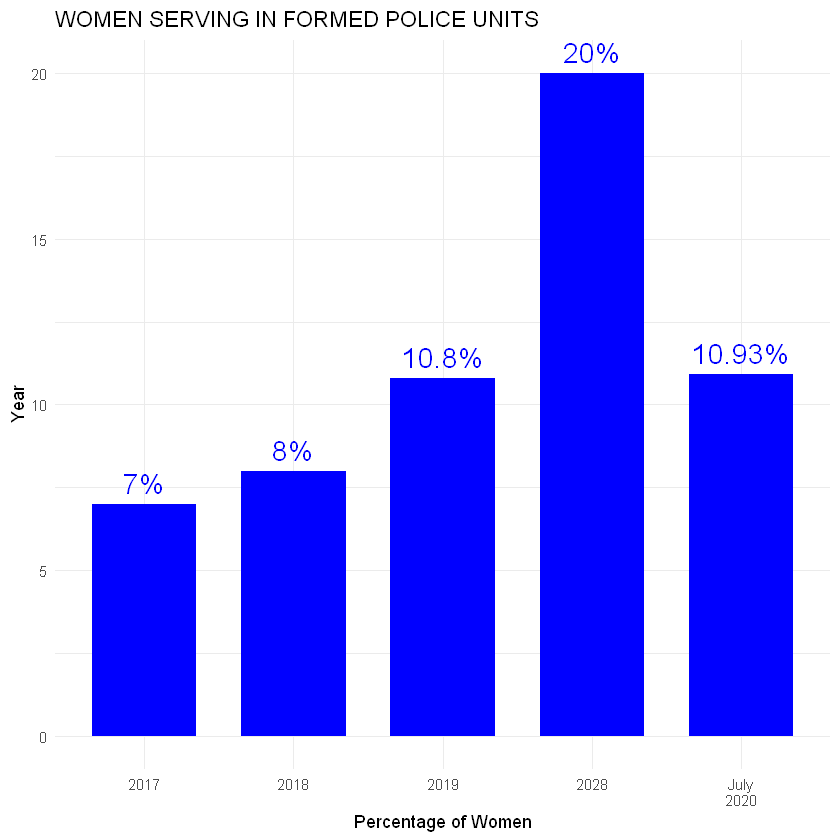

In [5]:
# Step 5
library(ggplot2) #import ggplot2

p_of_females = c(7, 8, 10.8, 20, round(percent_female_FPU*100, 2)) # creates vector representing y values of plot
year = c("2017","2018", "2019","2028","July\n2020") # creates vector representing x values of plot
un_female_FPU_df = data.frame(p_of_females, year) # creates data frame used to make the plot

# creates plot using the data frame
women_FPU_plot = ggplot(data = un_female_FPU_df, aes(x = year, y = p_of_females)) + 
geom_bar(stat = "identity", fill = "blue", width = 0.7) +
geom_text(aes(label = paste(as.character(p_of_females),"%", sep = "")), vjust = -0.5, size = 6, color = "blue") +
labs(title = "WOMEN SERVING IN FORMED POLICE UNITS", x = "Percentage of Women", y = "Year") + 
theme_minimal()

women_FPU_plot # display plot

In [6]:
# Step 6
un_df$Mission_Acronym = gsub(pattern = " ", replacement = "", x = un_df$Mission_Acronym) # removes trailling white space

# Function that takes ISO Code of a country 
# and displays number of missions that country 
# has gone on and each mission's name
missions_per_country = function(iso) {
    
    # subset the data frame for rows with the ISO Code inputted and three columns: ISO code, Country and Mission
    df_iso = un_df[un_df$ISOCode3 == iso, c("ISOCode3", "Contributing_Country", "Mission_Acronym")]
    
    df_iso$Mission_Acronym = as.factor(df_iso$Mission_Acronym) # convert text column to a factor column
    unique_missions = levels(df_iso$Mission_Acronym) # retrive factors (unique values) for column
    num_unquie_missions = length(unique_missions) # retrive number of unique values for column
    country = as.character(df_iso[1, "Contributing_Country"]) # Retrive country name 
    
    #print country name, iso code and number of unique missions
    cat(paste("Country:", country, "\nISO Code:", iso, "\nNumber of Unique Mission:", num_unquie_missions))
    cat("\n\nAll Unique Missions:\n")
    # print all missions from vector of unique missions
    for (mission in unique_missions){
        print(mission)
    }
    cat("\n--------------------------------\n\n")
}

Minerva_Rotation_Cities = c("USA", "KOR", "IND", "DEU", "ARG", "GBR") # vector of Minerva city ISO Codes

# Apply the function missions_per_country() to all items in Minerva_Rotation_Cities
for (city in Minerva_Rotation_Cities) {
    missions_per_country(city)
}

Country: United States of America (the) 
ISO Code: USA 
Number of Unique Mission: 23

All Unique Missions:
[1] "BINUH"
[1] "MINUJUSTH"
[1] "MINURCAT"
[1] "MINUSCA"
[1] "MINUSMA"
[1] "MINUSTAH"
[1] "MONUSCO"
[1] "UNAMA"
[1] "UNAMID"
[1] "UNAMSIL"
[1] "UNIKOM"
[1] "UNIOSIL"
[1] "UNMEE"
[1] "UNMIBH"
[1] "UNMIK"
[1] "UNMIL"
[1] "UNMIS"
[1] "UNMISET"
[1] "UNMISS"
[1] "UNMIT"
[1] "UNOTIL"
[1] "UNSMIL"
[1] "UNTSO"

--------------------------------

Country: Korea (the Republic of) 
ISO Code: KOR 
Number of Unique Mission: 17

All Unique Missions:
[1] "MINUJUSTH"
[1] "MINURSO"
[1] "MINUSTAH"
[1] "UNAMA"
[1] "UNAMID"
[1] "UNFICYP"
[1] "UNIFIL"
[1] "UNISFA"
[1] "UNMHA"
[1] "UNMIL"
[1] "UNMIN"
[1] "UNMIS"
[1] "UNMISET"
[1] "UNMISS"
[1] "UNMIT"
[1] "UNMOGIP"
[1] "UNOCI"

--------------------------------

Country: India 
ISO Code: IND 
Number of Unique Mission: 26

All Unique Missions:
[1] "MINUJUSTH"
[1] "MINURSO"
[1] "MINUSTAH"
[1] "MONUC"
[1] "MONUSCO"
[1] "ONUB"
[1] "UNAMA"
[1] "UNAMI"
[1] "UNA

In [7]:
# Step 7
# new column created from the sum of two existing columns
un_df$Total_Number_of_Personnel = un_df$Female_Personnel + un_df$Male_Personnel 
un_df$DATE = un_df$Last_Reporting_Date # new column which is a copy of an existing one

# subset data frame for mission MINUSMA and columns DATE and Total_Number _of _Personnel
un_df_MINUSMA = un_df[un_df$Mission_Acronym == "MINUSMA", c("DATE", "Total_Number_of_Personnel")]
colnames(un_df_MINUSMA) = c("DATE", "Total Number of Personnel") # renames columns of the data frame

summary(un_df_MINUSMA[, "Total Number of Personnel"]) # summary statistics of the data frame

 Total Number of Personnel
 Min.   :   1             
 1st Qu.:   2             
 Median :   8             
 Mean   : 114             
 3rd Qu.:  52             
 Max.   :1726             